# PCA In-Class Exercises

Exercises accompanying the lectures.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1:  Computing PCs Manually on a Synthetic Dataset

We begin by showing how to compute and visualize PCs manually on a simple 2-dim synthentic data set.  First, run the following code to generate 100 samples of synthetic data.  Each data point has `d=2` dimensions.

In [5]:
p = 0.5
std = 0.2
s = np.array([2,1])
d = 2
ns = 100

U = np.random.normal(0,std,(ns,d))
v = np.random.uniform(0,1,ns)
X = U + (v < p)[:,None]*s[None,:]

Create a scatter plot of the data of the two features of the data, `X[:,0]` and `X[:,1]`.

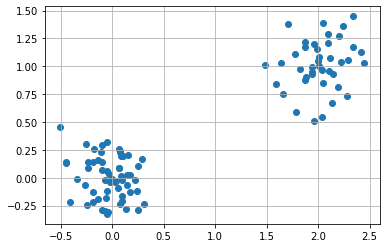

In [6]:
# TODO
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.grid()

We now manually compute the first principal component.  Later, we will find a faster way using an SVD.

*  Compute `xm` the mean of each of the two features.
*  Compute `Xm`, the matrix of data samples with the means removed
*  Compute the covariance matrix `Q = (1/ns)*Xm.T.dot(Xm)`
*  Compute the eigenvalues `lam` and eigenvectors `V` of `Q` using the `np.linalg.eigh(Q)` command.
*  Set `v0` be the eigenvector corresponding to the largest eigenvalue.  This is is the first PC.

In [7]:
# TODO
xm = np.mean(X,axis=0)
print(xm)
Xm = X - xm[None,:]
print(Xm.shape)
Q = (1/X.shape[0])*Xm.T.dot(Xm)
print(Q.shape)
lam, V = np.linalg.eigh(Q)
print(lam)
print(V)
v0 = V[:,np.argmax(lam)]
print(v0)

[0.80751745 0.41936536]
(100, 2)
(2, 2)
[0.0412975  1.29857176]
[[ 0.44443047 -0.89581335]
 [-0.89581335 -0.44443047]]
[-0.89581335 -0.44443047]


Compute the projection of the data vectors onto the first PC with the following:
    
    z[i] = Xm[i,:].dot(v0)
    Xhat[i,:] = xm + v0*z[i]
    
Note that we remove the mean when projecting and then add it back.
Create a scatter plot with:

*  The original data points `X[:,0], X[:,1]` in one color
*  The projected data points `Xhat[:,0], Xhat[:,1]` in a second color

(100,)
(2,)


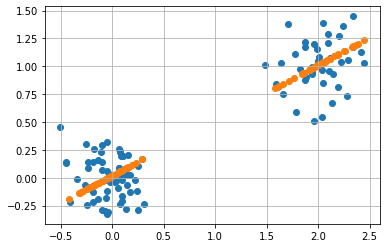

In [8]:
# TODO
z = Xm.dot(v0)
print(z.shape)
print(v0.shape)
Xhat = xm + z[:,None]*v0[None,:]

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.scatter(Xhat[:,0], Xhat[:,1])
plt.grid()

## Exercise 2:  Computing the Approximation Error

We now verify the approximation errors.  For each `k`:

*  Compute `Z`, the PC coefficients of `X` 
*  Compute `Xhat`, the PC approximation of `X` using `k` PC coefficients
*  Compute the approximation error, `err[k]` the average error `1/ns sum_{ij} (X[i,j]-Xhat[i,j])**2)`
*  Compute the expected approximation error, `err_pred[k]` the expected approximation error based on the eigenvalues `lam`.

Remember you will need to sort the eigenvalues in descending order.  You can use the command

     I = np.argsort(lam)[::-1]

(100, 2)
[1 0]
[0.0412975  1.29857176]
aprrox error: 0.04129749918908818; expected: 0.04129749918908798
aprrox error: 3.0458852904382566e-32; expected: 0


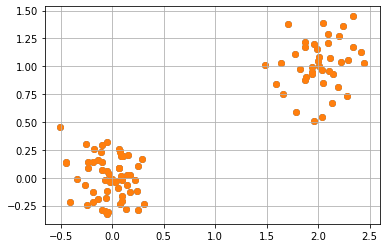

In [11]:
# Sort the eigenvalues in descending order
z = Xm.dot(v0)
Xhat0 = xm + z[:,None]*v0[None,:]

Z = Xm.dot(V.T)
Xhat1 = xm + Z.dot(V)
print(Xhat1.shape)
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.scatter(Xhat1[:,0], Xhat1[:,1])
plt.grid()

I = np.argsort(lam)[::-1]
print(I)

# TODO
err0 = np.mean(np.sum((X-Xhat0)**2, axis=1), axis=0)
err1 = np.mean(np.sum((X-Xhat1)**2, axis=1), axis=0)

err_pred0 = lam[I[1]]
err_pred1 = 0

print(lam)
print(f"aprrox error: {err0}; expected: {err_pred0}")
print(f"aprrox error: {err1}; expected: {err_pred1}")

## Exercise 3:  Computing the PCA via the SVD

*  Compute the matrix `A = 1/np.sqrt(ns)*Xm`
*  Compute the economy SVD of `A` with the `np.linalg.svd()` command.  Use `full_matrices=False` option.  Print the dimensions of the components of the SVD

In [43]:
# TODO
ns = X.shape[0]
A = (1/np.sqrt(ns))*Xm
U, s, Vtr = np.linalg.svd(A, full_matrices=False)
print(U.shape)
print(s.shape)
print(Vtr.shape)

(100, 2)
(2,)
(2, 2)


Verify that the singular values squared `s**2` match the eigenvalues of the covariance matrix `Q`. 

In [45]:
# TODO
print(lam)
print(s**2)

[0.04287011 1.26169806]
[1.26169806 0.04287011]


Compute the coefficients, `Zhat` of `X` on the PC vectors.  Make sure they match `Z` computed above (up to some sign and permutations).

In [48]:
# TODO
Zhat = np.sqrt(ns)*U*s
print(Zhat.shape)

(100, 2)


In [52]:
print(np.hstack((Z,Zhat)))

[[ 0.01424304  1.18168081 -1.18168081  0.01424304]
 [-0.26477814 -1.16315747  1.16315747 -0.26477814]
 [-0.04916576  1.12092246 -1.12092246 -0.04916576]
 [-0.27361399 -1.15363113  1.15363113 -0.27361399]
 [ 0.25796511 -0.98399376  0.98399376  0.25796511]
 [-0.35044596  1.28737953 -1.28737953 -0.35044596]
 [ 0.01602776 -1.01751438  1.01751438  0.01602776]
 [-0.25958414  0.95517942 -0.95517942 -0.25958414]
 [-0.20089713 -0.98951529  0.98951529 -0.20089713]
 [ 0.28383446  0.94162917 -0.94162917  0.28383446]
 [-0.03678548 -0.93648515  0.93648515 -0.03678548]
 [-0.02761266  1.0974732  -1.0974732  -0.02761266]
 [-0.28806545 -1.26469654  1.26469654 -0.28806545]
 [-0.15736315  1.26214296 -1.26214296 -0.15736315]
 [-0.08938756 -1.08873725  1.08873725 -0.08938756]
 [-0.06956203 -1.10601379  1.10601379 -0.06956203]
 [-0.42617715 -1.25446844  1.25446844 -0.42617715]
 [ 0.15587809 -0.8062081   0.8062081   0.15587809]
 [ 0.18447774 -1.19721859  1.19721859  0.18447774]
 [-0.32200841 -0.93581591  0.93

In [14]:
X = np.array([[1,2,3,4],[5,6,7,8]])
print(X)
x = X.ravel()
print(x)

[[1 2 3 4]
 [5 6 7 8]]
[1 2 3 4 5 6 7 8]


In [15]:
print(X.flatten())

[1 2 3 4 5 6 7 8]
